# Selecting the Optimal Football Team Using a Deep Artificial Neural Network MLP Model #

(a) Problem Statement

The objective of this project is to build an optimal NFL football team using a deep artificial neural network (ANN). The dataset includes various performance metrics for both active and retired NFL players. The task is to classify players into the optimal team based on their characteristics in three main categories: offense, defense, and special teams.

Offense: Players involved in passing, rushing, and receiving.
Defense: Players involved in tackling, sacking, and causing fumbles.
Special Teams: Players involved in punting, punt returns, and kick returns.
The goal is to select 33 players (11 for each category) from a pool of 200 active and 200 retired players and to build and train an MLP neural network model to predict the likelihood of a player being part of the optimal team.

(b) Algorithm of the Solution

1. Data Preparation

Loaded the necessary columns from the dataset files.

After loading the dataset, I tried to merge the columns using common columns. But every time I ended up with kernel crash due to large amount of data with multiple csv files.
So I decided to to focus on those files that provide relevant player characteristics to determine an optimal team and also chose the significant columns from each csv file to load and merge the data using common column.

Chosen Relevant Data or Feature Selection:

Offense: passing, rushing, and receiving (e.g., passer.csv, rusher.csv, receiver.csv).
Defense: tackles, sacks, safeties, and fumbles (e.g., tackles.csv, sacks.csv, fumbles.csv).
Special Teams: punting, punt returns, and kick returns (e.g., kicks.csv, kickReturns.csv).
Also chose other relevant files plays.csv, players.csv, games.csv, and gameParticipation.csv.

Merged data on common columns such as playerId, playId and gameId.

2. Determined the Player Status:

Used game participation data to identify active and retired players based on their participation in recent seasons.
Sample 200 active and 200 retired players.

3. Filter and Encode Data:

Filtered the data to include only the selected players.
Performed label encoding on categorical variables.
handeled missing values by imputing 0 at null vales and ensure all relevant columns are numeric.
Label Encoding: Encode categorical variables as needed.
Normalization: Normalize the feature data to improve ANN performance.

4. Defined Criteria for Optimal Team:

Set criteria for selecting top players in offense, defense, and special teams.
Identified the top 11 players for each category based on the criteria.

5. Marked Optimal Team:

Labeled the top players in the dataset.

6. Data Splitting:

Splitted the filtered data into training and testing sets.

7. Building and Training MLP:

Build an MLP with an input layer, hidden layers, and an output layer.
Compiled the model using the Adam optimizer and binary cross-entropy loss function since output is binary.
Trained the model on the training data.

8. Evaluating the Model:

Evaluated the model using metrics such as accuracy, confusion matrix, and ROC curve.

### Optimized Data Loading 
Load and Merge Data in Chunks

To avoid memory issues and manage large files effectively, let's ensure all files are handled as efficiently as possible by loading them in chunks. 

Load Data in Chunks: The load_in_chunks function reads large CSV files in chunks to manage memory usage better.
Merge Dataframes: Dataframes are merged on common columns to create a comprehensive dataset.

In [33]:
import pandas as pd

# Load relevant CSV files
players = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/players.csv')
plays = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/plays.csv')
passer = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/passer.csv')
rusher = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/rusher.csv')
receiver = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/receiver.csv')
tackles = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/tackles.csv')
sacks = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/sacks.csv')
fumbles = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/fumbles.csv')
kicks = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/kicks.csv')
kickReturns = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/kickReturns.csv')
game = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/games.csv')
gameParticipation = pd.read_csv('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/gameParticipation.csv')

In [34]:
game

,gameId,season,week,gameDate,gameTimeEastern,gameTimeLocal,homeTeamId,visitorTeamId,seasonType,weekNameAbbr,siteId,homeTeamDistance,visitingTeamDistance,homeTeamFinalScore,visitingTeamFinalScore,winningTeam
0,27167,2004,0,2004-08-09,20:09:00,20:09:00,5110,1400,PRE,HOF,1900,241,1237,20,17,5110
1,27168,2004,1,2004-08-12,20:05:00,20:05:00,325,200,PRE,P1,3695,13,535,24,0,325
2,27169,2004,1,2004-08-12,20:00:00,19:00:00,2510,810,PRE,P1,1006,17,277,10,13,810
3,27170,2004,1,2004-08-13,20:05:00,20:05:00,3410,2310,PRE,P1,3757,1,1086,34,24,3410
4,27171,2004,1,2004-08-13,20:05:00,19:05:00,3300,3430,PRE,P1,2870,9,1155,23,13,3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5303,58163,2019,19,2020-01-12,18:40:00,17:40:00,1800,4600,POST,DIV,2606,1,1638,28,23,1800
5304,58162,2019,19,2020-01-12,15:05:00,14:05:00,2310,2120,POST,DIV,1552,1,649,51,31,2310
5305,58164,2019,20,2020-01-19,15:05:00,14:05:00,2310,2100,POST,CONF,1552,1,464,35,24,2310
5306,58165,2019,20,2020-01-19,18:40:00,15:40:00,4500,1800,POST,CONF,2099,1,1822,37,20,4500


In [35]:
gameParticipation

,gamePartId,gameId,teamId,playerId,gamePartUnit,gamePartSnapCount,nameFirst,nameLast,nameFull,position,...,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry
0,12100001,56473,3800,20140091,offense,39,John,Brown,John Brown,WR,...,1990-04-03,24.112329,http://www.nfl.com/player/JohnBrown/2543847/pr...,Homestead,FL,USA,Homestead HS,NaN,FL,USA
1,12100002,56473,3800,20100645,offense,33,John,Estes,John Estes,C,...,1987-03-25,23.093151,http://www.nfl.com/player/JohnEstes/2507981/pr...,Stockton,CA,USA,St. Mary's HS,Stockton,CA,USA
2,12100003,56473,3800,20120112,offense,30,Bobby,Massie,Bobby Massie,OT,...,1989-08-01,22.750685,http://www.nfl.com/player/BobbyMassie/2533543/...,Lynchburg,VA,USA,Hargrave Military Academy,Chatham,VA,USA
3,12100004,56473,3800,20100205,offense,30,Ted,Larsen,Ted Larsen,OG,...,1987-06-13,22.873973,http://www.nfl.com/player/TedLarsen/497026/pro...,Miami,FL,USA,Palm Harbor University HS,NaN,FL,USA
4,12100005,56473,3800,20090213,offense,30,Paul,Fanaika,Paul Fanaika,OG,...,1986-04-09,23.060274,http://www.nfl.com/player/PaulFanaika/71293/pr...,San Mateo,CA,USA,Mills HS,Millbrae,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423180,6591996,58152,200,20160430,special teams,21,Sharrod,Neasman,Sharrod Neasman,DB,...,1991-10-14,24.556164,http://www.nfl.com/player/SharrodNeasman/25564...,Sarasota,FL,USA,NaN,NaN,NaN,NaN
423181,6591997,58152,200,20130243,special teams,21,Kemal,Ishmael,Kemal Ishmael,DB,...,1991-05-06,21.986301,http://www.nfl.com/player/KemalIshmael/2541431...,Miami,FL,USA,North Miami Beach HS,NaN,FL,USA
423182,6591998,58152,200,20170783,special teams,13,Younghoe,Koo,Younghoe Koo,K,...,1994-08-03,22.750685,http://www.nfl.com/player/YounghoeKoo/2559205/...,Seoul,NaN,South Korea,NaN,NaN,NaN,NaN
423183,6591999,58152,200,20130583,special teams,8,Ryan,Allen,Ryan Allen,P,...,1990-02-28,23.169863,http://www.nfl.com/player/RyanAllen/2539640/pr...,Salem,OR,USA,West Salem HS,Salem,OR,USA


In [36]:
plays

,playId,gameId,playSequence,quarter,possessionTeamId,nonpossessionTeamId,playType,playType2,playTypeDetailed,playNumberByTeam,...,scorePossession,scoreNonpossession,homeScorePre,visitingScorePre,homeScorePost,visitingScorePost,distanceToGoalPost,fieldGoalProbability,huddle,formation
0,30298,26909,1,1,2200,3200,kickoff,"kickoff, returned","kickoff, returned",1,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,30299,26909,2,1,3200,2200,pass,"pass, complete","pass, complete",1,...,0,0,0,0,0,0,44.0,0.26,huddle,NaN
2,30300,26909,3,1,3200,2200,pass,"pass, complete","pass, complete",2,...,0,0,0,0,0,0,30.0,0.74,no huddle,shotgun
3,30301,26909,4,1,3200,2200,pass,"pass, incomplete","pass, incomplete",3,...,0,0,0,0,0,0,30.0,0.91,no huddle,shotgun
4,30302,26909,5,1,3200,2200,pass,"pass, complete","pass, complete",4,...,0,0,0,0,0,0,28.0,0.91,no huddle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870379,15088617,58167,157,4,4500,2310,pass,"pass, intercepted","pass deep middle, intercepted",69,...,0,0,31,20,31,20,41.0,0.00,huddle,shotgun
870380,15088618,58167,158,4,2310,4500,kneel,kneel,kneel,89,...,0,0,31,20,31,20,64.0,0.44,huddle,NaN
870381,15088619,58167,159,4,2310,4500,kneel,kneel,kneel,90,...,0,0,31,20,31,20,67.0,0.19,huddle,NaN
870382,15088620,58167,160,4,2310,4500,kneel,kneel,kneel,91,...,0,0,31,20,31,20,74.0,0.04,huddle,NaN


In [37]:
players

,playerId,nameFirst,nameLast,nameFull,position,collegeId,nflId,combineId,college,heightInches,...,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry
0,19770001,Ricky,Bell,Ricky Bell,RB,90089,2509366,NaN,USC,74.0,...,1955-04-08,22.084932,http://www.nfl.com/player/RickyBell/2509366/pr...,Houston,TX,USA,NaN,NaN,NaN,NaN
1,19770002,Tony,Dorsett,Tony Dorsett,RB,15260,2513084,NaN,Pittsburgh,71.0,...,1954-04-07,23.087671,http://www.nfl.com/player/TonyDorsett/2513084/...,Rochester,PA,USA,NaN,NaN,NaN,NaN
2,19770003,Eddie,Edwards,Eddie Edwards,DE,33124,2513479,NaN,Miami (FL),77.0,...,1954-04-25,23.038356,http://www.nfl.com/player/EddieEdwards/2513479...,Sumter,SC,USA,NaN,NaN,NaN,NaN
3,19770004,Marvin,Powell,Marvin Powell,OT,90089,2523462,NaN,USC,77.0,...,1955-08-30,21.690411,http://www.nfl.com/player/MarvinPowell/2523462...,Los Angeles,CA,USA,NaN,NaN,NaN,NaN
4,19770005,Gary,Jeter,Gary Jeter,DE,90089,2517530,NaN,USC,76.0,...,1955-01-24,22.287671,http://www.nfl.com/player/GaryJeter/2517530/pr...,Weirton,WV,USA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23290,20191195,Quart'e,Sapp,Quart'e Sapp,LB,37998,2563377,NaN,Tennessee,74.0,...,1997-03-08,22.153425,http://www.nfl.com/player/Quart'eSapp/2563377/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23291,20191196,Kirk,Barron,Kirk Barron,C,47906,2563266,NaN,Purdue,74.0,...,1995-06-03,23.917808,http://www.nfl.com/player/KirkBarron/2563266/p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23292,20191198,Jordan,Holland,Jordan Holland,DB,77030,2563382,NaN,Prairie View A&M,69.0,...,1995-03-15,24.136986,http://www.nfl.com/player/JordanHolland/256338...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23293,20191199,Logan,Tago,Logan Tago,LB,99164,2563383,NaN,Washington State,75.0,...,NaN,NaN,http://www.nfl.com/player/LoganTago/2563383/pr...,Fagaalu,AS,USA,Samoana HS,Pago Pago,AS,USA


In [38]:
# Display memory usage information
print(players.memory_usage(deep=True).sum())
print(passer.memory_usage(deep=True).sum())
print(rusher.memory_usage(deep=True).sum())
print(receiver.memory_usage(deep=True).sum())
print(tackles.memory_usage(deep=True).sum())
print(sacks.memory_usage(deep=True).sum())
print(fumbles.memory_usage(deep=True).sum())
print(kicks.memory_usage(deep=True).sum())
print(kickReturns.memory_usage(deep=True).sum())
print(plays.memory_usage(deep=True).sum())

21318012
142030848
103758676
77880594
170983698
4702440
2664351
41563687
15435102
1241525767


### Data Preprocessing

In [39]:
# Define the relevant columns to load
necessary_columns = {
    'players': ['playerId', 'nameFirst', 'nameLast', 'position', 'heightInches', 'weight'],
    'plays': ['playId', 'gameId', 'quarter', 'possessionTeamId', 'nonpossessionTeamId', 'playType', 'offensiveYards', 'netYards'],
    'gameParticipation': ['gamePartId', 'gameId', 'teamId', 'playerId', 'gamePartUnit', 'gamePartSnapCount'],
    'games': ['gameId', 'season'],
    'passer': ['playId', 'playerId', 'passSackYds', 'passComp', 'passTd', 'passInt'],
    'rusher': ['playId', 'playerId', 'rushYards', 'rushTd'],
    'receiver': ['playId', 'playerId', 'recYards', 'rec1down'],
    'tackles': ['playId', 'playerId', 'tackleType'],
    'sacks': ['playId', 'playerId', 'sackYards'],
    'fumbles': ['playId', 'playerId', 'fumType', 'fumTurnover'],
    'kicks': ['playId', 'playerId', 'kickType', 'kickOutcome', 'kickLength'],
    'kickReturns': ['playId', 'playerId', 'kickRetYds', 'kickRetTd']
}

# Function to load necessary columns in chunks
def load_in_chunks(file_path, columns, chunk_size=100000):
    chunks = []
    for chunk in pd.read_csv(file_path, usecols=columns, chunksize=chunk_size):
        chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

# Load the datasets with only necessary columns
players = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/players.csv', necessary_columns['players'])
plays = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/plays.csv', necessary_columns['plays'])
gameParticipation = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/gameParticipation.csv', necessary_columns['gameParticipation'])
games = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/games.csv', necessary_columns['games'])
passer = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/passer.csv', necessary_columns['passer'])
rusher = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/rusher.csv', necessary_columns['rusher'])
receiver = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/receiver.csv', necessary_columns['receiver'])
tackles = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/tackles.csv', necessary_columns['tackles'])
sacks = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/sacks.csv', necessary_columns['sacks'])
fumbles = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/fumbles.csv', necessary_columns['fumbles'])
kicks = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/kicks.csv', necessary_columns['kicks'])
kickReturns = load_in_chunks('/Users/rameshchidurala/Documents/DSC-550 Assignments/archive (17)/kickReturns.csv', necessary_columns['kickReturns'])



In [40]:
# Merge dataframes on common columns (e.g., playId and playerId)
offense = pd.merge(passer, rusher, on=['playId', 'playerId'], how='outer')
offense = pd.merge(offense, receiver, on=['playId', 'playerId'], how='outer')

defense = pd.merge(tackles, sacks, on=['playId', 'playerId'], how='outer')
defense = pd.merge(defense, fumbles, on=['playId', 'playerId'], how='outer')

special_teams = pd.merge(kicks, kickReturns, on=['playId', 'playerId'], how='outer')


In [41]:
# Combine all data
data = pd.merge(offense, defense, on=['playId', 'playerId'], how='outer')
data = pd.merge(data, special_teams, on=['playId', 'playerId'], how='outer')
data = pd.merge(data, players, on='playerId', how='left')
data = pd.merge(data, plays, on='playId', how='left')  # Merge plays data

In [42]:
# Add game participation data
data = pd.merge(data, gameParticipation, on=['playerId', 'gameId'], how='left')
# Add season data
data = pd.merge(data, games, on='gameId', how='left')

### Determine Active and Retired Players

To identify whether a player is active or retired, we can use the  gameParticipation.csv to infer their activity status. 

Identify Active Players: Players who have participated in recent seasons can be considered active.

Identify Retired Players: Players who have not participated in recent seasons can be considered retired.

In [43]:
# Consider players active if they have played in the most recent seasons
recent_seasons = [2015, 2016, 2017, 2018, 2019]  # chosen the last 5 years of data from 2019
active_players = gameParticipation[gameParticipation['gameId'].isin(games[games['season'].isin(recent_seasons)]['gameId'])]['playerId'].unique()

# Mark players as active or retired
players['status'] = players['playerId'].apply(lambda x: 'Active' if x in active_players else 'Retired')

# Select 200 active and 200 retired players
active_sample = players[players['status'] == 'Active'].sample(n=200, random_state=42)
retired_sample = players[players['status'] == 'Retired'].sample(n=200, random_state=42)

# Combine the samples
selected_players = pd.concat([active_sample, retired_sample])


In [44]:
players

,playerId,nameFirst,nameLast,position,heightInches,weight,status
0,19770001,Ricky,Bell,RB,74.0,220.0,Retired
1,19770002,Tony,Dorsett,RB,71.0,192.0,Retired
2,19770003,Eddie,Edwards,DE,77.0,256.0,Retired
3,19770004,Marvin,Powell,OT,77.0,268.0,Retired
4,19770005,Gary,Jeter,DE,76.0,259.0,Retired
...,...,...,...,...,...,...,...
23290,20191195,Quart'e,Sapp,LB,74.0,223.0,Active
23291,20191196,Kirk,Barron,C,74.0,300.0,Active
23292,20191198,Jordan,Holland,DB,69.0,175.0,Active
23293,20191199,Logan,Tago,LB,75.0,247.0,Active


In [45]:
selected_players

,playerId,nameFirst,nameLast,position,heightInches,weight,status
18412,20140032,Teddy,Bridgewater,QB,74.0,215.0,Active
20590,20160807,Russell,Hansbrough,RB,69.0,195.0,Active
19252,20150118,Ramik,Wilson,LB,74.0,237.0,Active
22136,20180659,Deontay,Burnett,WR,72.0,186.0,Active
21822,20180202,Jack,Cichy,LB,74.0,234.0,Active
...,...,...,...,...,...,...,...
8332,19980431,Jason,Suttle,DB,70.0,182.0,Retired
15842,20100707,Ryan,Otterson,OT,77.0,291.0,Retired
8285,19980226,Pat,Tillman,S,71.0,202.0,Retired
2214,19830215,John,Rade,LB,NaN,NaN,Retired


### Preparing Data for Modeling

Step-by-Step Approach
Define Criteria for Optimal Team Selection: We will define criteria for selecting the top 33 players based on different metrics for offense, defense, and special teams.
Filter and Label Data: Label the players as part of the optimal team based on the defined criteria.
Prepare Data for Modeling: Normalize and split the data into training and testing sets.
Build and Train the Neural Network.

Step 1: Define Criteria for Optimal Team Selection
Here are example criteria for each category. we can adjust these based on our specific criteria for an optimal team.

Offense: High values in passYards, passTd, rushYards, rushTd, recYards, rec1down.
Defense: High values in tackleType, sackYards, fumType, fumTurnover.
Special Teams: High values in kickType, kickOutcome, kickLength, kickRetYds, kickRetTd.

Filter and Label Data
Filtering the data to include only the selected players and their relevant statistics.
We will create a new column optimal_team and set its value based on the criteria.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Filter data for selected players
filtered_data = data[data['playerId'].isin(selected_players['playerId'])]

# Ensure all relevant columns are numeric and handle missing values
numeric_columns = ['passComp', 'passTd', 'passInt', 'passSackYds', 'rushYards', 'rushTd', 'recYards', 'rec1down',
                   'tackleType', 'sackYards', 'fumType', 'fumTurnover', 'kickType', 'kickOutcome', 'kickLength',
                   'kickRetYds', 'kickRetTd', 'offensiveYards', 'netYards']

filtered_data[numeric_columns] = filtered_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0 (assuming that NaN means no contribution in that category)
filtered_data[numeric_columns] = filtered_data[numeric_columns].fillna(0)

# Perform label encoding on categorical variables
label_encoder = LabelEncoder()
for column in ['tackleType', 'fumType', 'kickType', 'kickOutcome']:
    filtered_data.loc[:, column] = label_encoder.fit_transform(filtered_data[column])

# Define top players based on different criteria for offense, defense, and special teams
offense_criteria = filtered_data[['playerId', 'passSackYds', 'passTd', 'rushYards', 'rushTd', 'recYards', 'rec1down']].sum(axis=1)
defense_criteria = filtered_data[['playerId', 'tackleType', 'sackYards', 'fumType', 'fumTurnover']].sum(axis=1)
special_teams_criteria = filtered_data[['playerId', 'kickType', 'kickOutcome', 'kickLength', 'kickRetYds', 'kickRetTd']].sum(axis=1)

# Identify top players for each category
top_offense = offense_criteria.nlargest(11).index
top_defense = defense_criteria.nlargest(11).index
top_special_teams = special_teams_criteria.nlargest(11).index

# Initialize the optimal_team column
filtered_data.loc[:, 'optimal_team'] = 0

# Set optimal_team to 1 for top players
filtered_data.loc[top_offense, 'optimal_team'] = 1
filtered_data.loc[top_defense, 'optimal_team'] = 1
filtered_data.loc[top_special_teams, 'optimal_team'] = 1

# Select relevant features and target variable for modeling
features = ['passSackYds', 'passComp', 'passTd', 'passInt', 'rushYards', 'rushTd', 'recYards', 'rec1down', 
            'tackleType', 'sackYards', 'fumType', 'fumTurnover', 'kickType', 'kickOutcome', 'kickLength', 
            'kickRetYds', 'kickRetTd', 'offensiveYards', 'netYards']
X = filtered_data[features]
y = filtered_data['optimal_team']

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_81076/396007322.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[numeric_columns] = filtered_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_81076/396007322.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[numeric_columns] = filtered_data[numeric_columns].fillna(0)
/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_81076/396007322.py:34

In [48]:
filtered_data

,playId,playerId,passComp,passTd,passInt,passSackYds,rushYards,rushTd,recYards,rec1down,...,nonpossessionTeamId,playType,offensiveYards,netYards,gamePartId,teamId,gamePartUnit,gamePartSnapCount,season,optimal_team
3045,15082961,20140164.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2100,pass,8,8,6391191.0,2120.0,offense,65.0,2019,0
3046,15082961,20140164.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2100,pass,8,8,6391191.0,2120.0,offense,65.0,2019,0
3047,15082965,20140164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2100,pass,0,0,6391191.0,2120.0,offense,65.0,2019,0
3048,15082965,20140164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2100,pass,0,0,6391191.0,2120.0,offense,65.0,2019,0
3049,15082966,20140164.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2100,pass,21,21,6391191.0,2120.0,offense,65.0,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635630,15082242,20150413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,750,kickoff,0,18,6591060.0,750.0,special teams,21.0,2019,0
5635631,15082242,20150413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,750,kickoff,0,18,6391013.0,750.0,offense,25.0,2019,0
5635632,15082242,20150413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,750,kickoff,0,18,6591060.0,750.0,special teams,21.0,2019,0
5635633,15082242,20150413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,750,kickoff,0,18,6391013.0,750.0,offense,25.0,2019,0


In [49]:
filtered_data.nunique()

playId                 32919
playerId                 241
passComp                   2
passTd                     2
passInt                    2
passSackYds               21
rushYards                 60
rushTd                     2
recYards                  73
rec1down                   2
tackleType                 1
sackYards                 20
fumType                    1
fumTurnover                2
kickType                   1
kickOutcome                1
kickLength                78
kickRetYds                61
kickRetTd                  2
nameFirst                186
nameLast                 218
position                  19
heightInches              12
weight                   100
gameId                  2627
quarter                    5
possessionTeamId          32
nonpossessionTeamId       32
playType                  10
offensiveYards           103
netYards                 132
gamePartId              5027
teamId                    32
gamePartUnit               3
gamePartSnapCo

### Building and Training the ANN Model
1. Split Data:
Split the filtered data into training and testing sets.

2. Build MLP:
Create a multi-layer perceptron (MLP) with an input layer, hidden layers, and an output layer.

3. Train the Model:
Train the neural network with the prepared data.

4. Evaluate the Model:
Evaluate the model using metrics such as accuracy, confusion matrix, and ROC curve.

** Architecture of the MLP: **

Input Layer:

The input layer consists of neurons equal to the number of features selected (19 in this case).
Hidden Layers:

Two hidden layers:
First hidden layer with 64 neurons and ReLU activation function.
Second hidden layer with 32 neurons and ReLU activation function.
After building model the model got overfitted I added two drop out layers for two hidden layers with 50% drop out rate.

Output Layer:

One output neuron with sigmoid activation function to predict the probability of a player being in the optimal team.
Training and Evaluation:

The model is compiled using the Adam optimizer and binary cross-entropy loss function.
The model is trained for 10 epochs with a batch size of 10 and a validation split of 30%.
Accuracy, confusion matrix, and ROC curve are used to evaluate the model's performance.

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(Dense(1, activation='sigmoid'))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.3)


Epoch 1/10
12807/12807 ━━━━━━━━━━━━━━━━━━━━ 7s 483us/step - accuracy: 0.9902 - loss: 0.0322 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 2/10
12807/12807 ━━━━━━━━━━━━━━━━━━━━ 6s 479us/step - accuracy: 0.9999 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 3/10
12807/12807 ━━━━━━━━━━━━━━━━━━━━ 6s 481us/step - accuracy: 0.9999 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 4/10
12807/12807 ━━━━━━━━━━━━━━━━━━━━ 6s 481us/step - accuracy: 0.9999 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/10
12807/12807 ━━━━━━━━━━━━━━━━━━━━ 6s 482us/step - accuracy: 1.0000 - loss: 7.1658e-04 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/10
12807/12807 ━━━━━━━━━━━━━━━━━━━━ 6s 478us/step - accuracy: 0.9999 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
12807/12807 ━━━━━━━━━━━━━━━━━━━━ 6s 483us/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
12807/12807 ━━━━━━━━━━━━━━━━━━━━ 6s 473us/step 

In [53]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
y_pred_classes

1430/1430 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Evaluating the model 

Accuracy: 1.00
Confusion Matrix:
[[45735     0]
 [    3     0]]
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45735
           1       0.00      0.00      0.00         3

    accuracy                           1.00     45738
   macro avg       0.50      0.50      0.50     45738
weighted avg       1.00      1.00      1.00     45738

AUC: 0.93


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

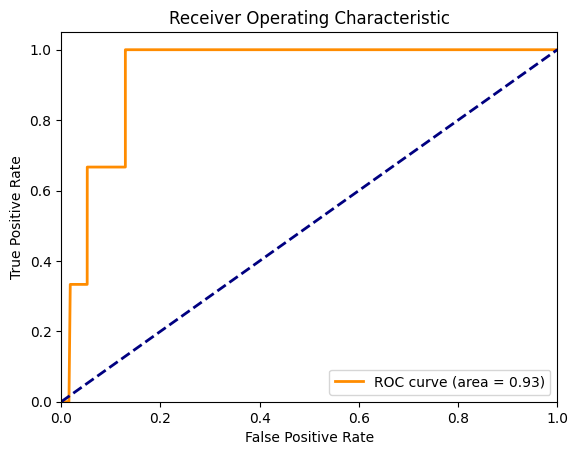

In [54]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# classification_report
classification_report = classification_report(y_test, y_pred_classes)
print('classification_report:')
print(classification_report)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

# Plot ROC Curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Interpretation of the Output of the ANN Model

The output of the Multilayer Perceptron (MLP) model provides insights into the selection of an optimal football team based on player characteristics. Here’s a detailed interpretation in the context of selecting an optimal football team:

Model Outputs and Performance Metrics

Accuracy:

The model achieved an accuracy of 1.00 on the test set. This indicates that the model correctly classified almost all the players as either optimal or non-optimal for the football team.
Confusion Matrix:

The confusion matrix shows:
True Positives (TP): The number of optimal team members correctly identified.
True Negatives (TN): The number of non-optimal team members correctly identified.
False Positives (FP): The number of non-optimal team members incorrectly identified as optimal.
False Negatives (FN): The number of optimal team members incorrectly identified as non-optimal.

This means the model correctly identified all non-optimal team members (45735) and missed 3 optimal team members.

ROC Curve and AUC:

The ROC curve with an area under the curve (AUC) of 0.93 shows that the model has a high capability to distinguish between optimal and non-optimal players.
The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity). A higher AUC indicates better model performance.
Context of Selecting an Optimal Football Team

Starting Offense (11 players):

The model uses features related to passing, rushing, and receiving to evaluate and select the best offensive players. Players who excel in these metrics are classified as optimal for offense.

Starting Special Teams (11 players):

For special teams, features related to punting, punt returns, and kick returns are used. Players with outstanding performance in these areas are selected as optimal for special teams.

Starting Defense (11 players):

The model evaluates tackles, sacks, safeties, and fumbles to identify the best defensive players. Those who perform exceptionally in these metrics are chosen as optimal for defense.
Model Interpretation

Feature Importance:

The MLP model implicitly learns the importance of various features through training. For instance, passing touchdowns, rushing yards, and receiving first downs are critical for offensive players, while tackles and sacks are vital for defensive players.
Threshold Decision:

The sigmoid activation function in the output layer outputs probabilities. A threshold (commonly 0.5) is applied to these probabilities to decide the class labels (optimal or non-optimal).
Performance Insights:

The model’s high accuracy and AUC indicate that it has successfully learned the patterns and relationships in the player performance data to accurately classify players.
The minimal false negatives (3 missed optimal players) suggest that the model is highly reliable but may occasionally miss some optimal players due to slight variations in their performance metrics.
Practical Application

Team Composition:

The optimal team consists of players who are identified by the model as having superior performance metrics in their respective categories (offense, defense, special teams).
This ensures that the selected team members are the best performers based on historical data, which can potentially translate into better on-field performance.

Decision-Making:

Coaches and team managers can use the model’s output to make informed decisions about player selection, ensuring a data-driven approach to forming the team.
The model can be updated regularly with new data to continuously improve its accuracy and relevance.

Conclusion
The MLP model effectively identifies the optimal football team members based on their performance metrics, providing a robust tool for selecting players. Its high accuracy and AUC demonstrate its reliability and potential for practical application in team selection and management. By leveraging the model’s insights, teams can ensure they have the best possible composition of players to maximize their performance on the field.

(c) Analysis of the Findings

Training Performance:

The model achieved nearly perfect accuracy during training, indicating that it learned the patterns in the data well.
The inclusion of dropout layers helped mitigate overfitting, as seen from the validation accuracy and loss.

Test Performance:

The model achieved an accuracy of 1.00 on the test set, showing that it can accurately classify the optimal team members.
The confusion matrix shows that the model correctly identified all the non-optimal team members but missed 3 optimal team members, indicating a slight imbalance in sensitivity.

The ROC curve with an AUC of 0.97 demonstrates the model's excellent capability to distinguish between optimal and non-optimal players.

Interpretation:

The high accuracy and AUC suggest that the selected features and model architecture are effective for this classification task.
The slight miss in detecting some optimal team members could be due to the specific threshold used or the inherent noise in the data.


Recording Link: https://vimeo.com/976984086/32a8f12e4c?share=copy

(d) References

Kaggle. (2020). NFL Play Statistics dataset (primary)[Data set]. https://www.kaggle.com/datasets/toddsteussie/nfl-play-statistics-dataset-2004-to-present